# Predicting ratings of a restaurant using Zomato dataset

This machine learning model deals with the Zomato dataset of restaurants in Bangalore, India. We have several features in this as we can see below. Not all of them are important to us and the ones that are important need to be converted and extracted in a usable format.

'**url**' : Contains the website link of the restaurant 

'**address**' : The address of a restaurant

'**name**' : The name of a restaurant

'**online_order**' : Yes or No values to see whether food was ordered online 

'**book_table**' : Yes or No values to see whether a reservation was made

'**rate**' : Rating of the restaurant

'**votes**' : Total number of votes received for the rating

'**phone**' : Phone number of the restaurant

'**location**' : Locality of a restaurant in the city of Bangalore.

'**rest_type**' : There are several categories available for this case such as Casual Dining, Quick Bites, Cafe, Dhaba, Bar, etc. and any given restaurant will at least have one of these categories but could have multiple.

'**dish_liked**' : The most liked dishes at a certain restaurant. Again, even this list has multiple values available. 

'**cuisines**': The kind of dishes available at a restaurant which could again have at least one value or multiple values.

'**approx_cost(for two people)**' : The cost for two people at a restaurant.

'**reviews_list**' : The reviews written by the customers about the certain restaurant.

'**menu_item**' : It comprises of some of the food options available at the restaurant.

'**listed_in(type)**' : It basically is a checker whether the restaurant has a Buffet, Cafe, Delivery or other type of food option.

'**listed_in(city)**' : The place in the city of Bangalore where it is located. Similar to location feature. There could be multiple locations in the listed_in(city) feature but not vice versa.


Now, it goes without saying that maximising profits is the main objective here and that means attracting more customers. We can also ask what features play the most crucial role for a restaurant to be successful. Let’s break it down. The food obviously is the most important feature of a restaurant. But many people also consider the location of the restaurant, how feasible it is to reach there, whether is it a good locality, etc. It is also important to see how affordable the restaurant is as most people would want to spend as less as possible. A cuisine of a restaurant is one of the most important factors of a restaurant as people usually have a certain cuisine in their mind and filter out the restaurant accordingly. It’s also important for a restaurant to prepare the food keeping the local taste buds in mind and alter the food accordingly instead of being completely or largely authentic. Whether the restaurant provides delivery or dine-in only are also factors to consider and all these things would finally impact the ratings of the restaurant. The ratings of a restaurant plays a crucial role for a customer to make the final decision about visiting the restaurant. 
Through some of the data analysis done, we can see that the locations of BTM and HSR attract 10% and 5% of the total customers and Quick Bites and Casual Dining are more preferred than other types of rest_type attracting 37% and 20% of the customers respectively. The key performance indicators in this case would be the rating which we would always prefer to be on the higher side.


# Abstract

I have first done the required data preprocessing after which I have got a usable dataset. Since I also have to perform NLP on this dataset, it would take a lot of time to run these cells and thus I have sliced the dataset. I have shown various data visulaizations to represent how closely related the features in the dataset and tried to find correlations between these features. 
I have tried implementing NLP for this project for the review feature which will see the number of most frequent words that have been used in a restaurant and then calculate the polarity of it after we have performed lemmitization on this. Once this is done, we perform sentiment analysis and get three results such as poitive, negative and neutral. We can then encode them so that all of the datat is numeric and then we can use this data for the final evaluation for our machine learning model. 

# Overview and Motivation

The reason for selecting this project was because I have some idea of how difficult it is to operate a restaurant especially while having immense competition from other restaurants. My uncle started a restaurant in Bangalore in 2019 called 'Taiki' and it was during this time that he introduced me to the variety of data that he takes into consideration which might seem pretty irrelevant at first, such as keeping the price of the dishes such that they neither seem to expensive nor too cheap. Also, when a restaurant is available for online delivery, people order it from either the food delivery app Zomato or Swiggy and they demand a major chunk of profits just to display the restaurant on their app, let alone promote it. And there is are different ratings for a restaurant for dine-ins and those who order online since people have different experiences. Also, it was a curiosity to know whether attributes such as location, online_delivery, reservations actually play an important role in the restaurant ratings. Thus as I was interested in knowing more about how a ratings of a restaurant are affected, I decided to make this a project and also having a huge dataset helped a lot for more accurate analysis. 

# Related Work

If looked up online, many examples can be seen working on this same dataset but for a variety of topics. Some researchers have worked just on a certain type of restaurant such as a Cafe or Casual Dining, while others have focused on other aspects. I have seen that most of these projects are not taking into consideration the reviews feature of the dataset and I will try to achieve this by implementing NLP. After lemmitization, we can see that the polarity feature which gives us an idea of how many words are positive, neutral and negative and then will be able to see the rating being high for the restaurants with more positve words.

# Initial Questions

My initial question in this project was to find out the probability of a customer going to the restaurant based on certain inputs from the customer such as location, rest_type, cuisine, etc so that based on the customer's liking and the overall rating of a restaurant, the machine learning model can give out a certain probability of a customer ending up in a certain restaurant. I soon realised that is a very vague question and had no actual purpose after which I changed the intended goal of the project, which was to predict the ratings of a restaurant and compare it with the actual ratings that have been received for the restaurant. 

The final research question that this project aims to answer is "**Can we use all the features of the dataset, especially the reviews_list feature after performing NLP analysis to predict the ratings of a restaurant?**" 

# Data

The source of this dataset can be found at https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants. Note that I don’t claim any copyright for the data. All copyrights for the data is owned by Zomato Media Pvt. Ltd

In [ ]:
# importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import re
import string

In [ ]:
df = pd.read_csv('zomato.csv')

In [ ]:
print("Shape of data=>",df.shape)
df.dtypes

Shape of data=> (51717, 17)


url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

Its time to drop some unnecessary columns as they do not add any significance to what we want to achieve. We can drop the url, phone and dish_liked features as they surely do not add any value to the data analysis.

In [ ]:
df.drop(['url', 'phone', 'dish_liked'], axis=1, inplace = True)

Now lets check for all the null values and then drop the rows with NaN values.

In [ ]:
print(df.isnull().sum())
df.dropna(how = 'any', inplace=True)

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64


Now we check for duplicates first and then remove all values that are getting duplicated.

In [ ]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

34


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [ ]:
# renaming and shortening the length of columns
df = df.rename(columns={'approx_cost(for two people)':'cost', 'listed_in(type)':'type', 'listed_in(city)':'city'})
df

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7 /5,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


We can see that the cost volumn has ',' in some of its values and they will create a problem convertng the number into an int or float.

In [ ]:
# We replace ',' with '.' in order to make it more usable in the correlation between different types of variables
df['cost'] = df['cost'].str.replace(',','.').astype(float)
df['cost'].head()

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: cost, dtype: float64

We are focussing on the replacing the NEW values with NaN to eliminate all string values and to convert it into float. After this process, we will then remove '/5' from the rating and only retain the number.

In [ ]:
# replacing the restaurants with 'NEW' Ratings to nan values
df['rate'] = df['rate'].replace('NEW',np.NaN) 
# replacing the restaurants with '-' Ratings to nan values 
df['rate'] = df['rate'].replace('-',np.NaN)
df['rate'] = df.loc[:,'rate'].replace('[ ]','',regex = True)
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].apply(lambda r: r.replace('/5',''))
df['rate'] = df['rate'].apply(lambda r: float(r))
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [ ]:
# making first letter of restaurant capital
df.name = df.name.apply(lambda x:x.title())
# replacing yes and no with true and false for ease of comparisons
df.online_order.replace(('Yes','No'),(True, False),inplace=True)
df.book_table.replace(('Yes','No'),(True, False),inplace=True)

# Exploratory Data Analysis

## Correlations between different features

In [ ]:
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'cost', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato
df_en = Encode(df.copy())

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

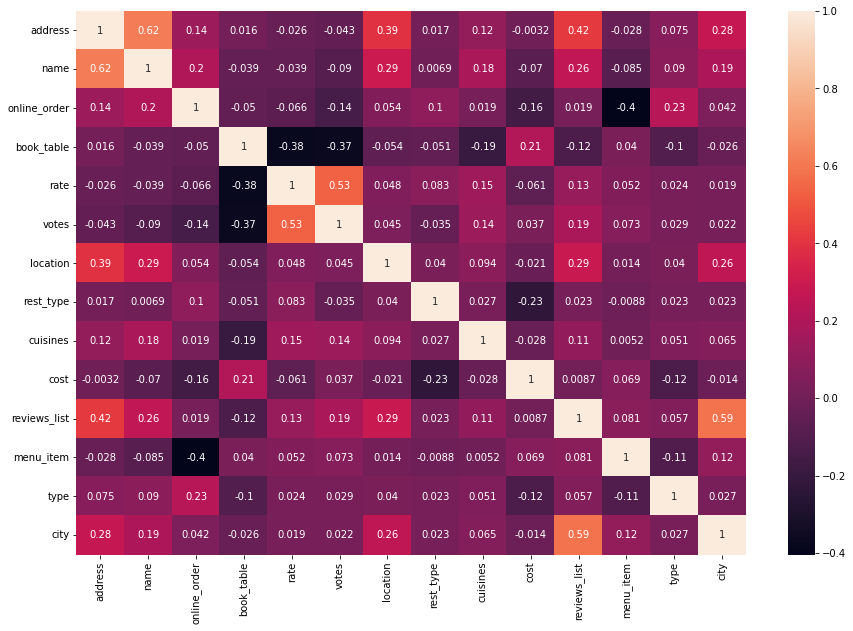

In [ ]:
# We use this to understand the values most closely related with another feature.
corr = df_en.corr(method='kendall')
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)
df.columns

## Data Visualisation and Comparisons between variables

Text(0.5, 1.0, 'Restaurant delivering online')

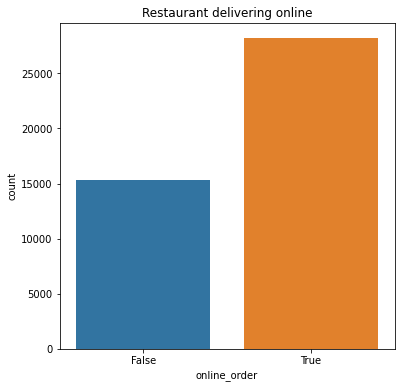

In [ ]:
# is restaurant delivering online 
sns.countplot(x=df['online_order'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Restaurant delivering online')

Text(0.5, 1.0, 'Restaurants allowing table booking or not')

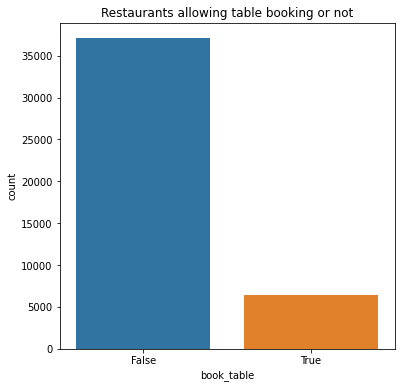

In [ ]:
#Restaurants allowing table booking or not
sns.countplot(x=df['book_table'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Restaurants allowing table booking or not')

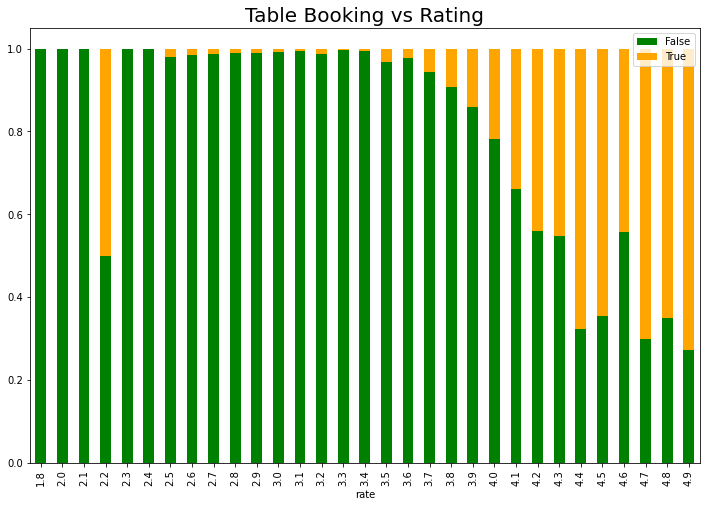

In [ ]:
# restaurans having table booking option vs the rating of the restaurant
plt.rcParams['figure.figsize'] = (12, 8)
Y = pd.crosstab(df['rate'], df['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['green','orange'])
plt.title('Table Booking vs Rating', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

Text(0.5, 1.0, 'Location')

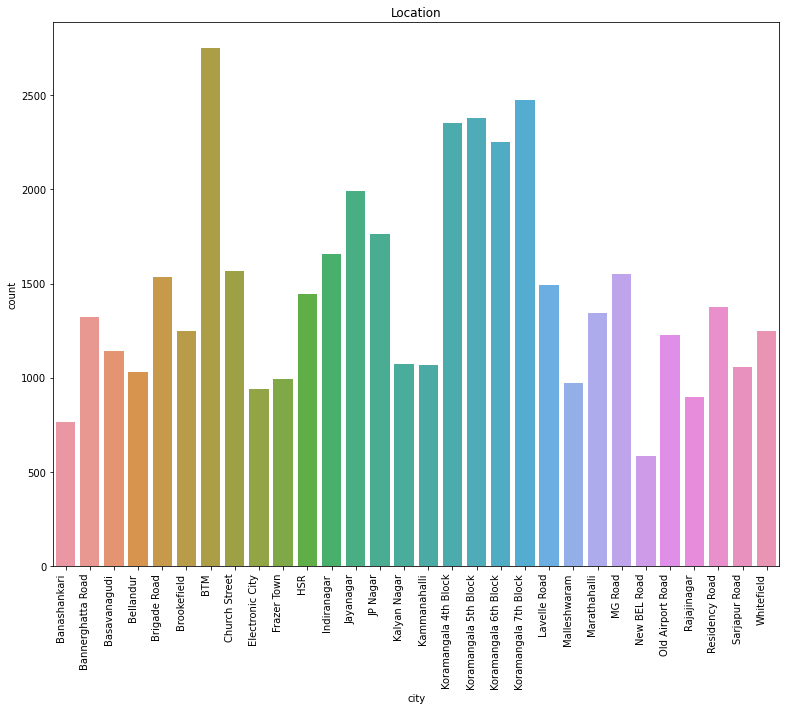

In [ ]:
# locations with most restaurants
sns.countplot(x= df['city'])
sns.countplot(x=df['city']).set_xticklabels(sns.countplot(x=df['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,10)
plt.title('Location')

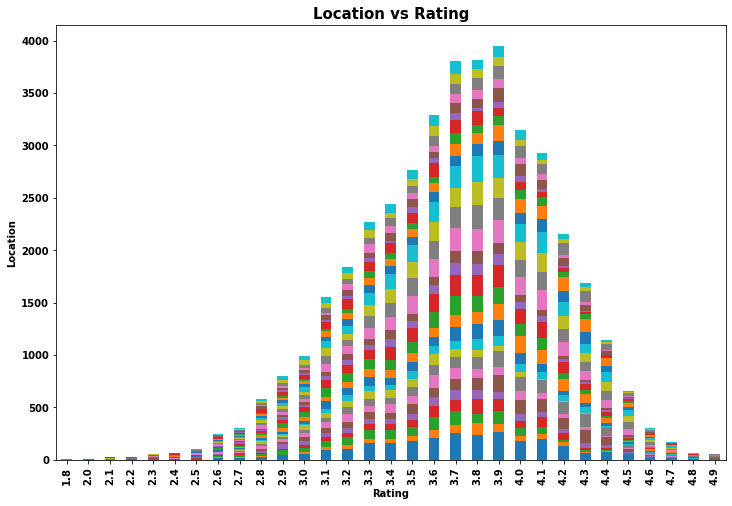

In [ ]:
# Location and Rating comparison
loc_plt=pd.crosstab(df['rate'],df['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Location vs Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

In [ ]:
import plotly.graph_objs as go
values = df['cuisines'].value_counts()[:20]
labels=values.index
text=values.index
fig = go.Figure(data=[go.Pie(values=values,labels=labels,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=3)))
fig.update_layout(title="Most popular cuisines of Bangalore ",
                  titlefont={'size': 30},
                  )
fig.show()

Text(0.5, 1.0, 'COST FOR 2 PEOPLE VS RESTAURANT GRAPH')

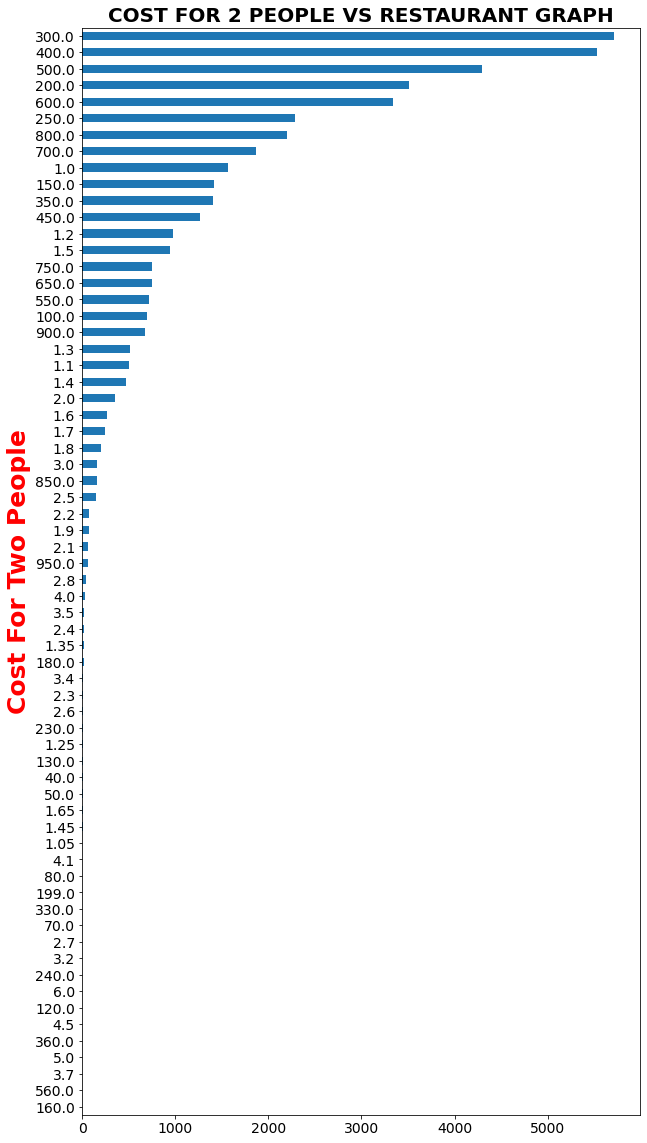

In [ ]:
CostCount=df['cost'].value_counts().sort_values(ascending=True)
fig=plt.figure(figsize=(10,20))
CostCount.plot(kind="barh",fontsize=14)
plt.ylabel("Cost For Two People",fontsize=25,color="red",fontweight='bold')
plt.title("COST FOR 2 PEOPLE VS RESTAURANT GRAPH",fontsize=20,color="BLACK",fontweight='bold')

Text(0.5, 1.0, 'Restuarant Type')

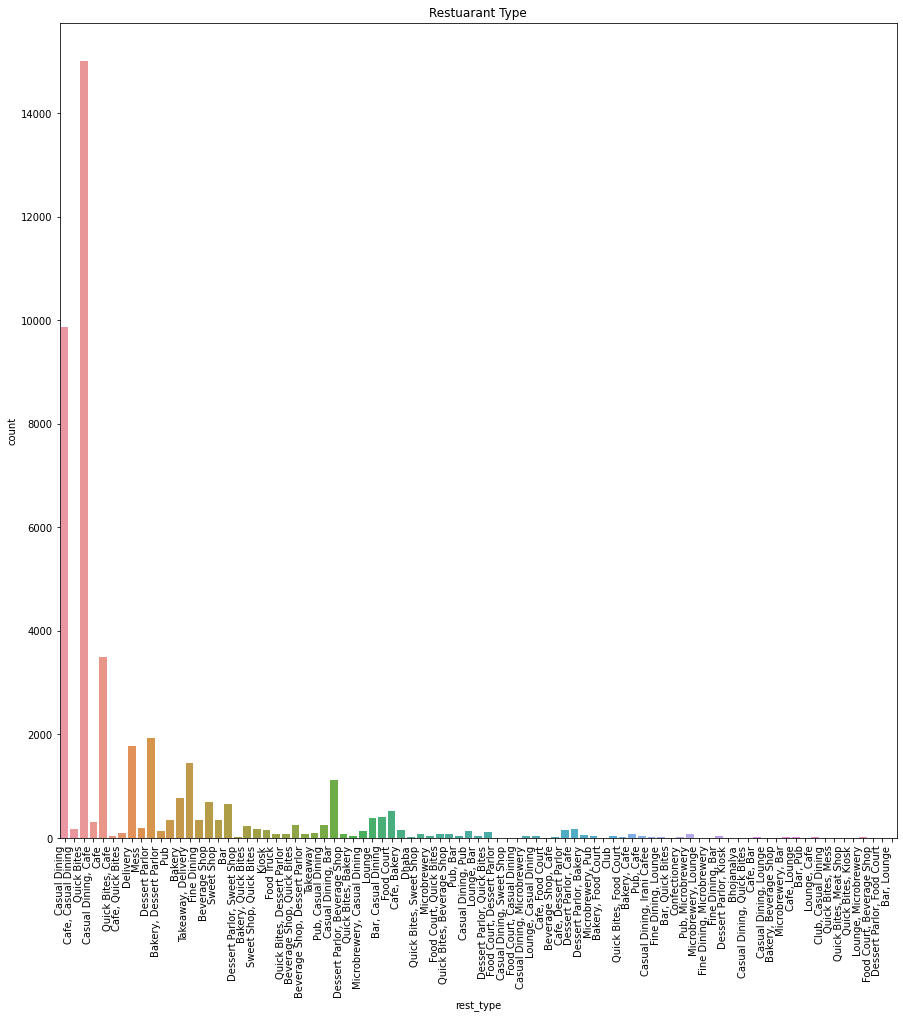

In [ ]:
# shows all type of different restaurant types 
sns.countplot(x= df['rest_type'])
sns.countplot(x= df['rest_type']).set_xticklabels(sns.countplot(x= df['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Restuarant Type')

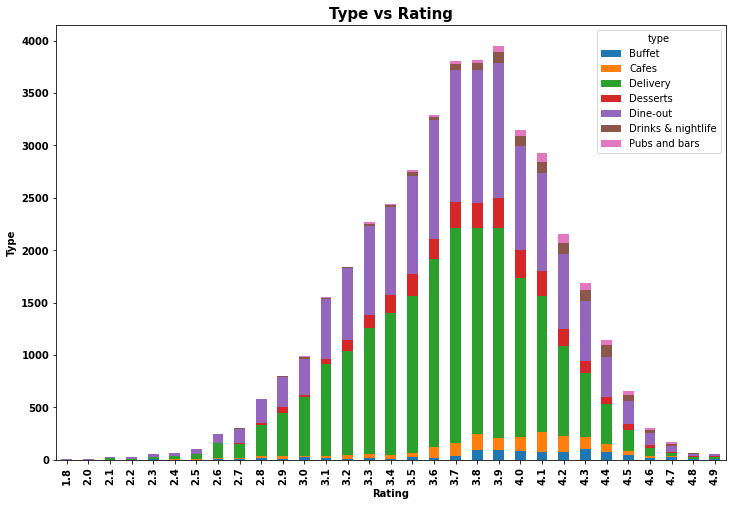

In [ ]:
#Type vs Rating
type_plt=pd.crosstab(df['rate'], df['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type vs Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

Text(0.5, 1.0, 'No. of restaurants in a Location')

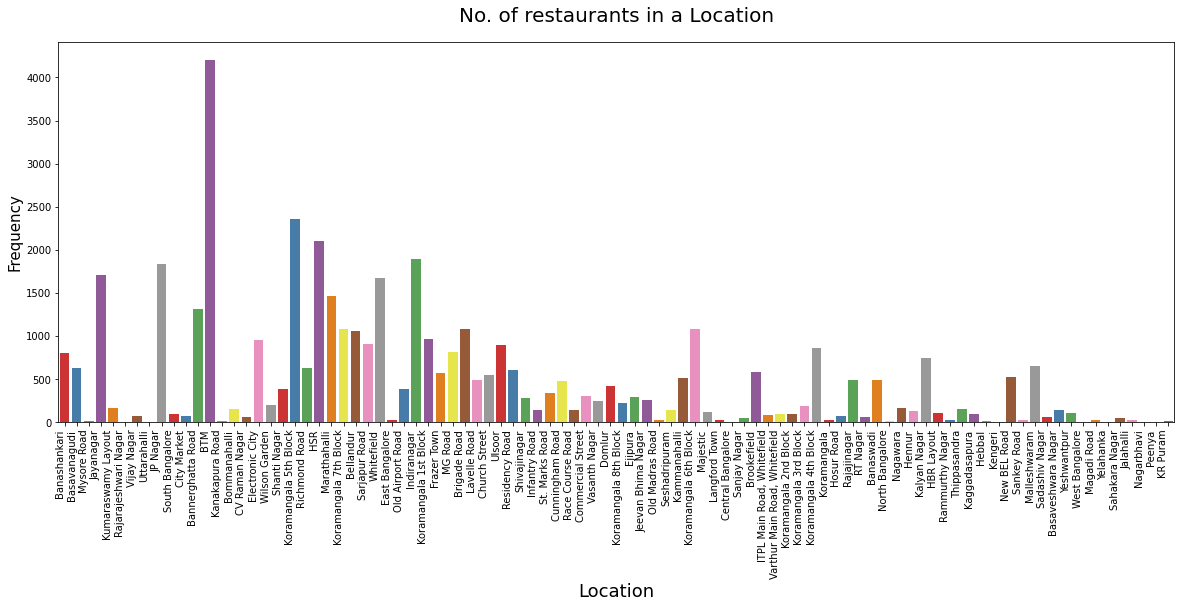

In [ ]:
# No. of restaurants in a Location,
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=df, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('No. of restaurants in a Location',size = 20,pad=20)

Text(0.5, 0, 'Number of outlets')

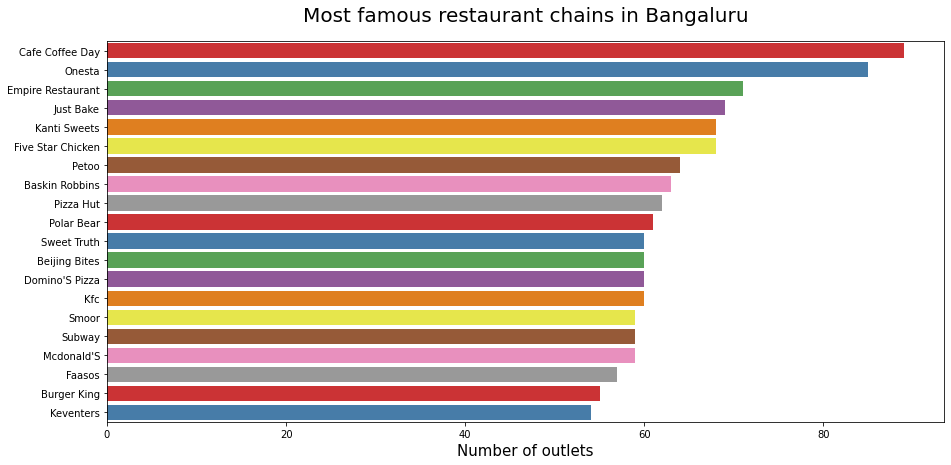

In [ ]:
# Most famous restaurant chains in Bengaluru
plt.figure(figsize=(15,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

## NLP and Sentiment Analysis

In [ ]:
# since we have a very huge dataset, we slice it to run the program faster
df1 = df.loc[:10000,:]

In [ ]:
# we lowercase the words, and remove all punctuation and numbers
df1['cleaned']=df1['reviews_list'].apply(lambda x: x.lower())
df1['cleaned']=df1['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))
df1['cleaned']=df1['cleaned'].apply(lambda x: re.sub('[%s]'%re.escape(string.punctuation), '', x))

<ipython-input-26-c9a461c5a6f8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-c9a461c5a6f8>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-c9a461c5a6f8>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# create a list of in text_token to evaluate the words
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df1['text_token']=df1['cleaned'].apply(regexp.tokenize)
df1.head(3)

<ipython-input-27-296b5cd74350>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,cleaned,text_token
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,rated ratedn a beautiful place to dine inthe...,"[rated, ratedn, a, beautiful, place, to, dine,..."
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,rated ratedn had been here for dinner with f...,"[rated, ratedn, had, been, here, for, dinner, ..."
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,rated ratedn ambience is not that good enoug...,"[rated, ratedn, ambience, is, not, that, good,..."


In [ ]:
# download stopwords
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with own custom stopwords
my_stopwords = ['https', 'rated', 'ratedn']
stopwords.extend(my_stopwords)

In [ ]:
# remove stopwords
df1['text_token'] = df1['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df1.head(3)

<ipython-input-30-2f9e8a990e6d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,cleaned,text_token
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,rated ratedn a beautiful place to dine inthe...,"[beautiful, place, dine, inthe, interiors, tak..."
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,rated ratedn had been here for dinner with f...,"[dinner, family, turned, good, choose, suitabl..."
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,rated ratedn ambience is not that good enoug...,"[ambience, good, enough, pocket, friendly, caf..."


In [ ]:
# remove list for lemmatization
df1['text_string'] = df1['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
df1.head(3)

<ipython-input-31-15f8ac353469>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,cleaned,text_token,text_string
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,rated ratedn a beautiful place to dine inthe...,"[beautiful, place, dine, inthe, interiors, tak...",beautiful place dine inthe interiors take back...
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,rated ratedn had been here for dinner with f...,"[dinner, family, turned, good, choose, suitabl...",dinner family turned good choose suitable ages...
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,rated ratedn ambience is not that good enoug...,"[ambience, good, enough, pocket, friendly, caf...",ambience good enough pocket friendly cafe quan...


In [ ]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df1['lemmatized']=df1['text_string'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning:

Can't initialize NVML

<ipython-input-32-02525f2af03a>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# name of restaurant and view lemmatized words
df_grouped= df1[['name','lemmatized']].groupby(by='name').agg(lambda x:' '.join(x))
df_grouped

,lemmatized
name,
#Feeltheroll,egg chicken roll paneer roll yummy visit place...
#Refuel,order schezwan paneer sandwich combo taste goo...
1000 B.C,order chicken subwich offer here suggestion no...
12Th Main - Grand Mercure,go recently dinner buffet friend experience fa...
1441 Pizzeria,rupee pizza tortilla thin base will not fill s...
...,...
Zodiac,lot option spread veg nonveg descent food prep...
Zodiac - Fortune Select Jp Cosmos Hotel,visit restaurant stay hotel firstly lunch ala ...
Zoey'S,brilliant food point kaikondrahalli dusty lane...


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
all_words_lem = ' '.join([word for word in df1['lemmatized']])

In [ ]:
df1['lemmatized'][0]

'beautiful place dine inthe interior mughal era lighting perfectwe go occasion christmas limit item available taste service compromise allthe complaint bread betterwould surely like come dinner family weekday restaurant completely ambience good good old hindi music seat arrangement good order masala papad panner baby corn starter lemon corrionder soup butter roti olive chilli paratha food fresh good service good good family hangoutncheer restaurant near banashankari bda office friend visit buffet unfortunately provide veg buffet inquire say place visit vegetarian anyways order ala carte item take age come food definitely visit anymore go weekend buffet take ala carte firstly ambience service place great buffet lot item good good pumpkin halwa intm dessert amazing try kulchas great cheer good thing place itã ambiance second good thing yummy food try buffet buffet food disappoint usntest nquality nservice staff professional friendlynnoverall experience excellentnwixsitecom great food ple

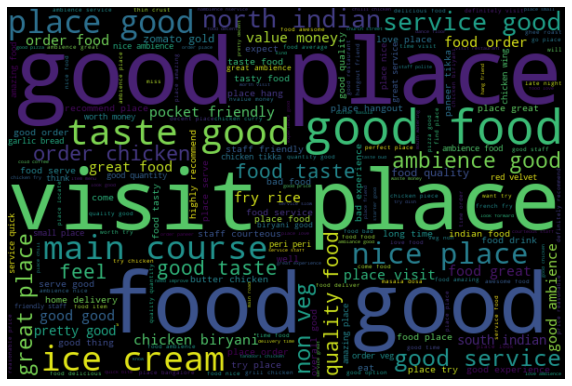

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

This gives out the overall result for all restaurants together and not just a single restaurant. 

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

df1['polarity'] = df1['lemmatized'].apply(lambda x: analyzer.polarity_scores(x))

<ipython-input-40-d16b1e09bfec>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# sort in descending order based on rating
df1.sort_values(by=['rate'], ascending=False)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,cleaned,text_token,text_string,lemmatized,polarity
7888,"120 A3, 2nd Floor, Santosh Tower, EPIP Industr...",Flechazo,False,True,4.9,2745,Whitefield,Casual Dining,"Asian, Mediterranean, North Indian, BBQ",1.4,"[('Rated 5.0', 'RATED\n Food quality is amazi...",[],Dine-out,Brookefield,rated ratedn food quality is amazing and the...,"[food, quality, amazing, spicy, chilly, prawns...",food quality amazing spicy chilly prawns start...,food quality amazing spicy chilly prawn starte...,"{'neg': 0.012, 'neu': 0.609, 'pos': 0.379, 'co..."
7118,"Ground Floor, Forum Shantiniketan, Whitefield ...",Punjab Grill,True,False,4.9,518,Whitefield,Casual Dining,North Indian,2.0,"[('Rated 5.0', 'RATED\n The food is great...t...","['Multani Paneer Tikka', 'Dal Punjab Grill', '...",Delivery,Brookefield,rated ratedn the food is greatthe ambience i...,"[food, greatthe, ambience, perfect, staff, fri...",food greatthe ambience perfect staff friendly ...,food greatthe ambience perfect staff friendly ...,"{'neg': 0.018, 'neu': 0.608, 'pos': 0.375, 'co..."
9099,"136, Ground Floor, 1st Cross, 5th Block, Jyoti...",Asia Kitchen By Mainland China,True,True,4.9,2178,Koramangala 5th Block,"Casual Dining, Bar","Asian, Chinese, Thai, Momos",1.5,"[('Rated 5.0', ""RATED\n This is not just one ...",[],Delivery,BTM,rated ratedn this is not just one of the chi...,"[one, chinese, restaurant, one, best, bangalor...",one chinese restaurant one best bangalore surp...,chinese restaurant good bangalore surprised co...,"{'neg': 0.03, 'neu': 0.607, 'pos': 0.363, 'com..."
6746,"120 A3, 2nd Floor, Santosh Tower, EPIP Industr...",Flechazo,False,True,4.9,2745,Whitefield,Casual Dining,"Asian, Mediterranean, North Indian, BBQ",1.4,"[('Rated 5.0', 'RATED\n Food quality is amazi...",[],Buffet,Brookefield,rated ratedn food quality is amazing and the...,"[food, quality, amazing, spicy, chilly, prawns...",food quality amazing spicy chilly prawns start...,food quality amazing spicy chilly prawn starte...,"{'neg': 0.023, 'neu': 0.625, 'pos': 0.352, 'co..."
5809,"65, Markham Road, Ashok Nagar, Brigade Road, B...",Belgian Waffle Factory,True,False,4.9,1746,Brigade Road,Dessert Parlor,Desserts,400.0,"[('Rated 3.0', ""RATED\n Waffles are totally w...",[],Desserts,Brigade Road,rated ratedn waffles are totally worth it re...,"[waffles, totally, worth, really, loved, red, ...",waffles totally worth really loved red velvet ...,waffle totally worth love red velvet cheese wa...,"{'neg': 0.064, 'neu': 0.607, 'pos': 0.329, 'co..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9967,"67, Ground Floor, 3rd E Main Road, 15th Cross ...",Nourich,True,True,NaN,0,JP Nagar,Casual Dining,"Continental, Chinese, North Indian, Asian, Hea...",800.0,"[('Rated 5.0', 'RATED\n The ambience is reall...","['Vegetarian Rice Vermicelli', 'Vegetable Ital...",Delivery,BTM,rated ratedn the ambience is really pretty i...,"[ambience, really, pretty, iã, love, thai, opt...",ambience really pretty love thai options loved...,ambience pretty love thai option love pad thai...,"{'neg': 0.0, 'neu': 0.331, 'pos': 0.669, 'comp..."
9975,"Plot 172/1, Kiosk P-K-03, Vega City Mall, Srin...",Beir,True,False,NaN,0,Bannerghatta Road,Casual Dining,"Mexican, American",800.0,"[('Rated 5.0', 'RATED\n The taste of burger w...","['Burnt Garlic Rice with Grilled Paneer', 'Gri...",Delivery,BTM,rated ratedn the taste of burger was really ...,"[taste, burger, really, good, affordable, pric...",taste burger really good affordable price floa...,taste burger good affordable price float serve...,"{'neg': 0.043, 'neu': 0.614, 'pos': 0.343, 'co..."
9992,"172/1, 3rd Floor, Vega City Mall, Srinivas Ind...",Smooth,False,False,NaN,0,Bannerghatta Road,Food Court,"Desserts, Ice Cream",200.0,[],[],Delivery,BTM,,[],,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
9995,"199/C, 1st Stage, Mahaganapathi Nagar, Basaves..

In [ ]:
df1.loc[:,['name', 'polarity']].head(3)

,name,polarity
0,Jalsa,"{'neg': 0.044, 'neu': 0.587, 'pos': 0.369, 'co..."
1,Spice Elephant,"{'neg': 0.066, 'neu': 0.64, 'pos': 0.295, 'com..."
2,San Churro Cafe,"{'neg': 0.065, 'neu': 0.627, 'pos': 0.308, 'co..."


In [ ]:
df1.loc[:,['name', 'polarity']].tail(3)

,name,polarity
9996,Northern Bites,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
9997,Cafe Arabica,"{'neg': 0.0, 'neu': 0.55, 'pos': 0.45, 'compou..."
10000,North Indian And Bengali Mess,"{'neg': 0.048, 'neu': 0.669, 'pos': 0.283, 'co..."


In [ ]:
df1 = pd.concat([df1.drop([ 'polarity'], axis=1), 
     df1['polarity'].apply(pd.Series)], axis=1)
df1.head(3)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,...,type,city,cleaned,text_token,text_string,lemmatized,neg,neu,pos,compound
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,...,Buffet,Banashankari,rated ratedn a beautiful place to dine inthe...,"[beautiful, place, dine, inthe, interiors, tak...",beautiful place dine inthe interiors take back...,beautiful place dine inthe interior mughal era...,0.044,0.587,0.369,0.9991
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,...,Buffet,Banashankari,rated ratedn had been here for dinner with f...,"[dinner, family, turned, good, choose, suitabl...",dinner family turned good choose suitable ages...,dinner family turn good choose suitable age pe...,0.066,0.640,0.295,0.9989
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,...,Buffet,Banashankari,rated ratedn ambience is not that good enoug...,"[ambience, good, enough, pocket, friendly, caf...",ambience good enough pocket friendly cafe quan...,ambience good pocket friendly cafe quantity go...,0.065,0.627,0.308,0.9995


In [ ]:
df1['sentiment'] = df1['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')

In [ ]:
df1.loc[lambda df1: df1['sentiment'] == 'negative'].head(5)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,...,city,cleaned,text_token,text_string,lemmatized,neg,neu,pos,compound,sentiment
20,"146, 50 ft Road, 3rd Phase, 3rd Stage, Near Ka...",The Vintage Cafe,True,False,3.0,62,Banashankari,Cafe,"Cafe, French, North Indian",400.0,...,Banashankari,rated ratedn this is a tiny cafãâ© l...,"[tiny, cafã, â, located, opposite, kathriguppe...",tiny cafã located opposite kathriguppe water t...,tiny cafã locate opposite kathriguppe water ta...,0.204,0.639,0.157,-0.6774,negative
21,"3353, 2nd Cross, Opposite Auden School, Hosker...",Woodee Pizza,True,False,3.7,180,Banashankari,Cafe,"Cafe, Pizza, Fast Food, Beverages",500.0,...,Banashankari,rated ratedn decided to take a break from my...,"[decided, take, break, usual, pizza, parlour, ...",decided take break usual pizza parlour also co...,decide break usual pizza parlour coz love pine...,0.144,0.732,0.124,-0.1336,negative
69,"59/3, Ground & First Floor, West Anjaneya Temp...",Burger King,True,False,3.2,71,Basavanagudi,Quick Bites,"Burger, Fast Food, Beverages",600.0,...,Banashankari,rated ratedn burger king is a well know plac...,"[burger, king, well, know, place, varieties, b...",burger king well know place varieties burgers ...,burger king know place variety burger find var...,0.156,0.844,0.000,-0.7096,negative
77,"16th Main Road, Near PESIT College, Banashanka...",Devanna Dum Biriyani Centre,True,False,3.6,28,Banashankari,Quick Bites,"Biryani, South Indian",300.0,...,Banashankari,rated ratedn in the food i ordered chicken l...,"[food, ordered, chicken, lollypop, smelt, bad,...",food ordered chicken lollypop smelt bad smell ...,food order chicken lollypop smell bad smell li...,0.162,0.695,0.144,-0.3182,negative
110,"594, 24 The Cross BSK, Opposte Oriental Bank, ...",Hari Super Sandwich,False,False,NaN,0,Banashankari,"Takeaway, Delivery","Sandwich, Pizza, Beverages",200.0,...,Banashankari,rated ratedn i have been here many times whe...,"[many, times, located, bda, crispy, n, crunchy...",many times located bda crispy crunchy sandwich...,time locate bda crispy crunchy sandwich shift ...,0.120,0.751,0.129,-0.1280,negative


In [ ]:
df1.loc[lambda df1: df1['sentiment'] == 'positive'].head(5)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,...,city,cleaned,text_token,text_string,lemmatized,neg,neu,pos,compound,sentiment
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,...,Banashankari,rated ratedn a beautiful place to dine inthe...,"[beautiful, place, dine, inthe, interiors, tak...",beautiful place dine inthe interiors take back...,beautiful place dine inthe interior mughal era...,0.044,0.587,0.369,0.9991,positive
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,...,Banashankari,rated ratedn had been here for dinner with f...,"[dinner, family, turned, good, choose, suitabl...",dinner family turned good choose suitable ages...,dinner family turn good choose suitable age pe...,0.066,0.640,0.295,0.9989,positive
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,...,Banashankari,rated ratedn ambience is not that good enoug...,"[ambience, good, enough, pocket, friendly, caf...",ambience good enough pocket friendly cafe quan...,ambience good pocket friendly cafe quantity go...,0.065,0.627,0.308,0.9995,positive
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,...,Banashankari,rated ratedn great food and proper karnataka...,"[great, food, proper, karnataka, style, full, ...",great food proper karnataka style full meals t...,great food proper karnataka style meal twice f...,0.044,0.712,0.243,0.9998,positive
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,...,Banashankari,rated ratedn very good restaurant in neighbo...,"[good, restaurant, neighbourhood, buffet, syst...",good restaurant neighbourhood buffet system pr...,good restaurant neighbourhood buffet system pr...,0.000,0.714,0.286,0.9682,positive


In [ ]:
df1['sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

The compound score is the sum of positive, negative & neutral scores which is then normalized between -1(most extreme negative) and +1 (most extreme positive). The more Compound score closer to +1, the higher the positivity of the text

# Full Analysis

The analysis of the entire project is long and I will try my best to explain each and every step that needs to be explained. 

I first start off by loading the dataset following which will then undergo some basic preprocessing and then work with the final dataset which can be found in the data folder. I later do lots of data visualisations before which I try to find the correlations between different features and then make use of lots of bar and pie graphs. It was also quite surprising to see that during the visualisations, we can see how closely related some features actually are to each other. We can see that the tatings of the restaurant rated 4 and above have reservation option which can explain the increase in rating and then we can see that there are some locations that are more preferred and have much more restaurants as compared to others. We also see that for restaurants with cost for two people is around Rs 300 - 400 are much higher in numbers than others and then also get a sense of the most popular cuisines. 

After these, I perform the NLP on the reviews feature and then at the end of it, get new features in the form of positive, negative, neutral, compound and finally the sentiment which give out more features to make more accurate predictions. Now that NLP is performed, this will answer the research question that I have wanted to answer through this project and then predict the ratings of the restaurant using the features that I get from this analysis.

We can see from the results for model prediction that the Random Forest Regressor gives the lowest mean squared error and thus is the ideal model to be used for this project. I was able to finally get new features from the review feature and able to encode it in a numeric format so as to get extra features for evaluation of the model and get more accurate results. I am sure that the hyperparametric tuning if done morein depth will help me yield much better results. Since the final list of lemmatized words comprised of some words that made no sense, it would be ideal to add more of these stopwords and extend the list so as to get a much better analysis in future.


## Model Revision

In [ ]:
# importing all necessary machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
df1.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city', 'cleaned', 'text_token', 'text_string',
       'lemmatized', 'neg', 'neu', 'pos', 'compound', 'sentiment'],
      dtype='object')

In [ ]:
df1.drop(columns=['reviews_list', 'cleaned', 'text_token', 'text_string', 'lemmatized'], inplace=True)
df_en = Encode(df1.copy())
df_en.dropna(how='any', inplace=True)
x = df_en.loc[:,['online_order','book_table', 'votes', 'location',	'rest_type', 'cuisines', 'cost', 'menu_item', 'compound', 'sentiment']]
y = df_en.loc[:,'rate']

In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
minmax = lambda x: (x - x.min())/(x.max() - x.min())

In [ ]:
target = df_en.rate

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(minmax(df_en),target, random_state=2)

In [ ]:
lr = LinearRegression(n_jobs=-1)
svr = SVR()
rf = RandomForestRegressor(random_state=44, n_jobs=-1)
models = [lr, svr, rf]
for model in models:
    model.fit(x_train, y_train)
    pred_model = model.predict(x_test)
    print(f'The RMSE of {model.__class__.__name__} is {rmse(y_test, pred_model)}')

The RMSE of LinearRegression is 1.3176354521903615e-15
The RMSE of SVR is 0.05183143098988496
The RMSE of RandomForestRegressor is 0.0016817679130526457


## Tuning Hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [ ]:
rmse_scoring = make_scorer(rmse, greater_is_better=False)

In [ ]:
param_grid = {'n_estimators':[20, 50, 100], 'max_features': [None, 'sqrt', 0.5]}
grid_search = GridSearchCV(estimator= rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring=rmse_scoring)
grid_search.fit(x_train, y_train)
None

In [ ]:
grid_search_pred = grid_search.predict(x_test)
score_grid_search = rmse(y_test, grid_search_pred)
best_estimator = grid_search.best_estimator_
print(f'The best estimator is:\n {best_estimator} \n and the it\'s score is {score_grid_search}')

The best estimator is:
 RandomForestRegressor(max_features=None, n_estimators=50, n_jobs=-1,
                      random_state=44) 
 and the it's score is 0.0017775490538161631


# What is the point?

The main reason of the project was to predict the ratings of the restaurant. But here, not only do I use the features that were already present to make predictions but I also make new features from an exisiting one so that it has more data to make more accurate results. I used several EDA and data visualisation methods to show how one feature is related to another along with various other analysis with NLP and how they will impact the final predictions. I have tried my best to follow a structured approach and explaining steps wherever needed so that everything looks readable and understandable to anyone that will see this project. 